This program will predict if a student will pass based on students grades on assessments.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [12]:
# Upload data.
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('grades.csv')
# To print the first seven rows.
df.head(7)

Saving grades.csv to grades.csv


,q1,q2,q3,q4,q5,test1,test2,test3,test4,test5,test
0,5,6,3,5,8,2,4,2,4,1,0
1,5,3,7,4,3,5,6,5,3,5,0
2,1,5,9,3,7,3,3,8,4,1,0
3,4,9,6,8,8,2,1,8,4,1,0
4,2,3,5,6,1,3,1,2,9,6,0
5,9,3,7,1,2,8,7,0,6,4,0
6,3,6,8,5,4,0,6,1,4,9,0


In [13]:
# Set data to a array.
dataset = df.values
dataset

array([[ 5,  6,  3, ...,  4,  1,  0],
       [ 5,  3,  7, ...,  3,  5,  0],
       [ 1,  5,  9, ...,  4,  1,  0],
       ...,
       [ 1,  4,  1, ...,  5,  1,  0],
       [ 5,  5,  7, ..., 10,  4,  0],
       [ 2, 10,  3, ...,  5,  7,  0]])

In [14]:
# Get the rows from the columns 0 to 10 not including 10.
x = dataset[:,0:10]
# Get the rows from the column at position 10.
y = dataset[:,10]

In [15]:
# Now use the mininum-maximum scaler so all the values are between 0 and 1 inclusive.
min_max_scaler = MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.5, 0.6, 0.3, ..., 0.2, 0.4, 0.1],
       [0.5, 0.3, 0.7, ..., 0.5, 0.3, 0.5],
       [0.1, 0.5, 0.9, ..., 0.8, 0.4, 0.1],
       ...,
       [0.1, 0.4, 0.1, ..., 1. , 0.5, 0.1],
       [0.5, 0.5, 0.7, ..., 0.5, 1. , 0.4],
       [0.2, 1. , 0.3, ..., 1. , 0.5, 0.7]])

In [16]:
# Set 80 percen training and 20 percent (10% test and 10% validating)
x_train,x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test,y_val_and_test, test_size = 0.5)
# The training has 167 data point, validation has 21 data points and the variables have 10 input features.
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(167, 10) (21, 10) (21, 10) (167,) (21,) (21,)


In [17]:
# We make the model architecture here.
model = Sequential()
model.add(Dense(units = 12, activation = 'relu', input_dim = 10))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [18]:
# The funtion measures how well the model was, and then improves using the optimizers.
#model.compile(optimizer='sgd',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.compile(optimizer='sgd',loss = 'binary_crossentropy', metrics=['accuracy'])

In [19]:
#Now we train the data.
hist = model.fit(x_train,y_train,
                 batch_size=32, epochs=100, validation_data=(x_val,y_val))

Epoch 1/100
6/6 [==============================] - 1s 32ms/step - loss: 0.7127 - accuracy: 0.3772 - val_loss: 0.6934 - val_accuracy: 0.6190
Epoch 2/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6962 - accuracy: 0.5329 - val_loss: 0.6769 - val_accuracy: 0.8095
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6800 - accuracy: 0.7186 - val_loss: 0.6609 - val_accuracy: 0.9048
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6646 - accuracy: 0.8683 - val_loss: 0.6455 - val_accuracy: 0.9524
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6497 - accuracy: 0.9461 - val_loss: 0.6311 - val_accuracy: 1.0000
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.6358 - accuracy: 0.9581 - val_loss: 0.6172 - val_accuracy: 1.0000
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6226 - accuracy: 0.9641 - val_loss: 0.6044 - val_accuracy: 1.0000
Epoch 8/100
6/6 [=========

In [20]:
model.evaluate(x_test,y_test)[1]

1/1 [==============================] - 0s 17ms/step - loss: 0.0776 - accuracy: 1.0000


1.0

In [21]:
# Predict.
prediction = model.predict(x_test)
print(prediction)
'''for y in prediction:
  y.tolist()
  prediction = [1 if p>=.70 else 0 for p in y]'''

prediction = [1 if y>=.70 else 0 for y in prediction]
print("The predictions",prediction)
print("The answer",y_test)

[[0.05957568]
 [0.04913688]
 [0.06330621]
 [0.06040993]
 [0.05710447]
 [0.08498845]
 [0.06184584]
 [0.09666789]
 [0.08515039]
 [0.06792542]
 [0.07023233]
 [0.08211902]
 [0.05995938]
 [0.11252242]
 [0.07506731]
 [0.08411846]
 [0.09540352]
 [0.07236144]
 [0.06231254]
 [0.08455378]
 [0.07971063]]
The predictions [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The answer [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


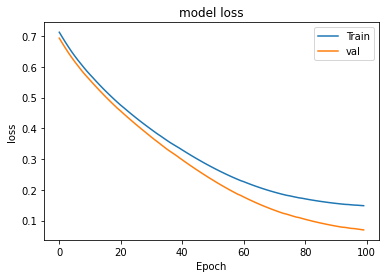

In [22]:
# Visualization
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'])

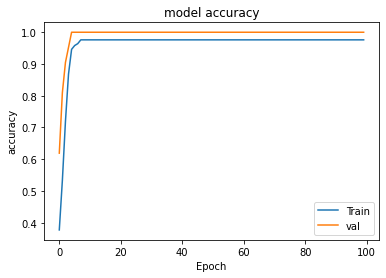

In [23]:
# Visualization
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'val'])

In [25]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('grades copy.csv')
df.head(7)

Saving grades copy.csv to grades copy (3).csv


,q1,q2,q3,q4,q5,test1,test2,test3,test4,test5,grade,average:
0,7,9,8,8,10,5,9,9,7,9,1,8.1
1,9,1,10,4,3,4,2,9,0,2,0,4.4
2,4,5,6,4,6,9,1,10,2,1,0,4.8
3,1,10,8,7,7,8,2,8,2,3,0,5.6
4,8,5,6,4,8,6,2,7,1,6,0,5.3
5,9,1,1,0,10,9,8,0,3,5,0,4.6
6,8,9,10,7,9,9,3,3,0,0,0,5.8


In [26]:
dataset = df.values
dataset

array([[ 7. ,  9. ,  8. , ...,  9. ,  1. ,  8.1],
       [ 9. ,  1. , 10. , ...,  2. ,  0. ,  4.4],
       [ 4. ,  5. ,  6. , ...,  1. ,  0. ,  4.8],
       ...,
       [ 8. ,  0. ,  5. , ...,  8. ,  0. ,  4.6],
       [ 6. ,  3. ,  7. , ...,  4. ,  0. ,  6.1],
       [ 6. ,  7. ,  9. , ...,  6. ,  0. ,  5. ]])

In [27]:
# Get the rows.
x = dataset[:,0:10]
y = dataset[:,10]

In [28]:
# Now use the mininum-maximum scaler
min_max_scaler = MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.7, 0.9, 0.8, ..., 0.9, 0.7, 0.9],
       [0.9, 0.1, 1. , ..., 0.9, 0. , 0.2],
       [0.4, 0.5, 0.6, ..., 1. , 0.2, 0.1],
       ...,
       [0.8, 0. , 0.5, ..., 0.4, 0.2, 0.8],
       [0.6, 0.3, 0.7, ..., 0.5, 0.1, 0.4],
       [0.6, 0.7, 0.9, ..., 0. , 0.3, 0.6]])

In [29]:
# Set 50 percent training and 20 percent (10% test and 10% validating)
x_train,x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale,y,test_size=0.5)
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test,y_val_and_test, test_size = 0.5)
# The training has 6 data point, validation has 1 data points and the variables have 10.
print(x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape)

(104, 10) (52, 10) (53, 10) (104,) (52,) (53,)


In [30]:
#Now we train the data.
hist = model.fit(x_train,y_train,
                 batch_size=32, epochs=50, validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 0s 57ms/step - loss: 0.1307 - accuracy: 0.9808 - val_loss: 0.1840 - val_accuracy: 0.9615
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 0.1301 - accuracy: 0.9808 - val_loss: 0.1837 - val_accuracy: 0.9615
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1294 - accuracy: 0.9808 - val_loss: 0.1835 - val_accuracy: 0.9615
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1288 - accuracy: 0.9808 - val_loss: 0.1833 - val_accuracy: 0.9615
Epoch 5/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1283 - accuracy: 0.9808 - val_loss: 0.1830 - val_accuracy: 0.9615
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1277 - accuracy: 0.9808 - val_loss: 0.1830 - val_accuracy: 0.9615
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1275 - accuracy: 0.9808 - val_loss: 0.1828 - val_accuracy: 0.9615
Epoch 8/50
4/4 [===========

In [32]:
model.evaluate(x_test,y_test)[1]

2/2 [==============================] - 0s 5ms/step - loss: 0.1798 - accuracy: 0.9623


0.9622641801834106

In [33]:
# Predict.
prediction = model.predict(x_test)
print(prediction)
'''for y in prediction:
  y.tolist()
  prediction = [1 if p>=.85 else 0 for p in y]'''

prediction = [1 if y>=.70 else 0 for y in prediction]
print("The predictions",prediction)
print("The answer",y_test)

[[0.03710836]
 [0.04125917]
 [0.0595361 ]
 [0.02573645]
 [0.02359676]
 [0.05629385]
 [0.04385683]
 [0.02744028]
 [0.02912611]
 [0.02714705]
 [0.03157246]
 [0.04883119]
 [0.04078344]
 [0.02875772]
 [0.03423524]
 [0.05370787]
 [0.05808103]
 [0.03485325]
 [0.06206328]
 [0.06244057]
 [0.02898607]
 [0.04153991]
 [0.03249264]
 [0.04467925]
 [0.0524762 ]
 [0.05754092]
 [0.05725649]
 [0.04282415]
 [0.05687255]
 [0.03236914]
 [0.05701813]
 [0.03621334]
 [0.03126267]
 [0.06339416]
 [0.02594039]
 [0.02566811]
 [0.0405587 ]
 [0.05614448]
 [0.03245834]
 [0.06480643]
 [0.04152283]
 [0.03597388]
 [0.02652505]
 [0.05272889]
 [0.04006466]
 [0.04727352]
 [0.02912492]
 [0.03658316]
 [0.04619056]
 [0.05391487]
 [0.04719076]
 [0.04544333]
 [0.03692007]]
The predictions [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
The answer [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [34]:
#Now save the model to train later if we want.
# https://stackoverflow.com/questions/42666046/loading-a-trained-keras-model-and-continue-training
model.save('./MyModel_tf',save_format='tf')

INFO:tensorflow:Assets written to: ./MyModel_tf/assets


In [35]:
!zip -r /content/MyModel_tf.zip /content/MyModel_tf/

  adding: content/MyModel_tf/ (stored 0%)
  adding: content/MyModel_tf/saved_model.pb (deflated 88%)
  adding: content/MyModel_tf/keras_metadata.pb (deflated 87%)
  adding: content/MyModel_tf/assets/ (stored 0%)
  adding: content/MyModel_tf/variables/ (stored 0%)
  adding: content/MyModel_tf/variables/variables.data-00000-of-00001 (deflated 59%)
  adding: content/MyModel_tf/variables/variables.index (deflated 54%)
